## Day 2

### Spherical Coordinates

- Explain RA, DEC
  - Spherical systems
  - Ecliptic system
  - Other spherial coordinate systems
- Use astropy.coordinates to transform RA, DEC to Galactic coordinates
- Overlay galactic grid over the wcsaxes image
- Clean up notebook and get it ready for presentation

In [26]:
from astropy import coordinates as coord
import astropy.units as u
import matplotlib.pyplot as plt
#%matplotlib inline
%matplotlib notebook

In [9]:
from astropy.io import fits
from astropy import table
from astropy import wcs

In [10]:
sources = table.Table.read('sources.csv')
f = fits.open('MAST_2019-12-16T0515/HST/ib2j02020/ib2j02020_drz.fits')
w = wcs.WCS(f[1].header)

In [15]:
x, y = sources['xcentroid'], sources['ycentroid']
sky_coord = w.pixel_to_world(x, y)

In [16]:
sky_coord

<SkyCoord (ICRS): (ra, dec) in deg
    [(6.06758707, -72.06419756), (6.06833798, -72.06445269),
     (6.06618364, -72.0638162 ), ..., (6.05777469, -72.12891349),
     (6.05519731, -72.12828154), (6.05633645, -72.12864239)]>

In [17]:
sky_coord.frame

<ICRS Coordinate: (ra, dec) in deg
    [(6.06758707, -72.06419756), (6.06833798, -72.06445269),
     (6.06618364, -72.0638162 ), ..., (6.05777469, -72.12891349),
     (6.05519731, -72.12828154), (6.05633645, -72.12864239)]>

In [18]:
sky_coord.galactic

<SkyCoord (Galactic): (l, b) in deg
    [(305.87951598, -44.90824448), (305.87913957, -44.90802655),
     (305.88019947, -44.90855736), ..., (305.87015126, -44.84379906),
     (305.87138693, -44.84430638), (305.87082368, -44.84400153)]>

<IPython.core.display.Javascript object>


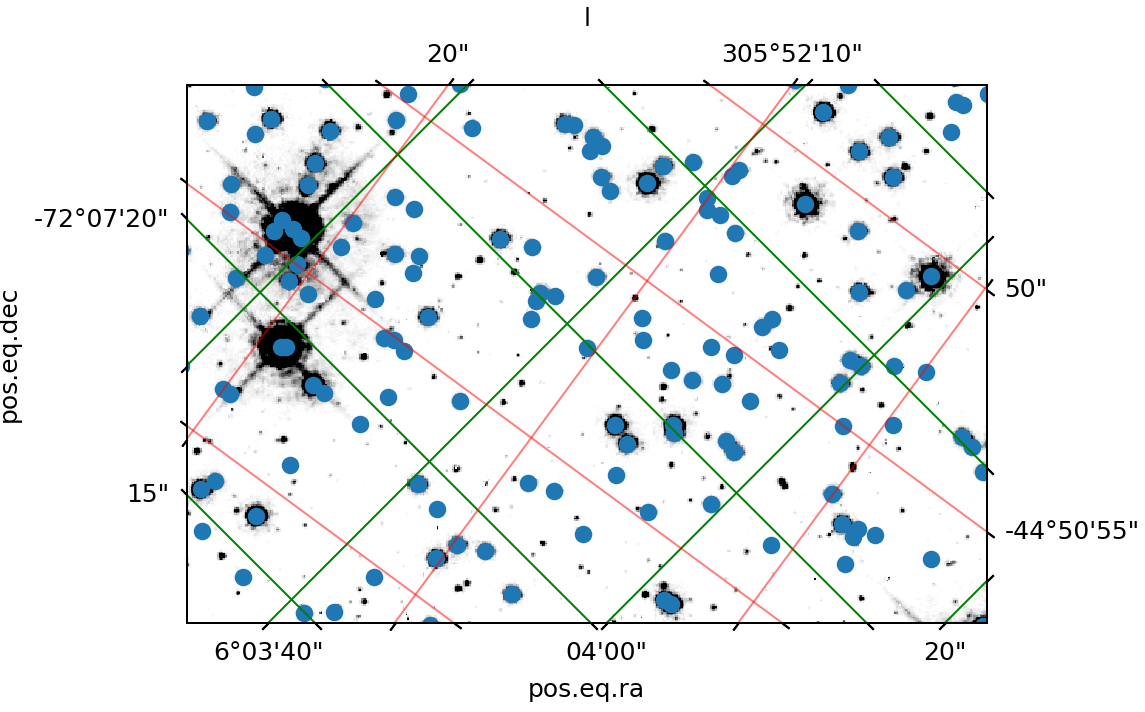

In [27]:
ax = plt.subplot(projection=w)
ax.imshow(f[1].data, vmin=.1, vmax=.5, cmap='Greys', origin='lower')
ax.scatter(ra, dec, transform=ax.get_transform('world'))

ax.coords[0].set_format_unit(u.degree)

In [28]:
ax.grid(color='green', ls='solid')
overlay=ax.get_coords_overlay('galactic') 
overlay.grid(color='red', linestyle='solid', alpha=0.5)